# Machine Learning Final Project

## Amirmohammad Shahbandegan (Student ID: 1172613)
## Aditya Singhal (Student ID: 1154832)
## 10 December 2021


# Introduction
This project has two main stages. First each image dataset in the dataset is converted to a numerical feature vector. This stage is done using Python and stored in a file for later use in the CUDA C++ code.
In the second stage, Extreme Learning Machine (ELM) algorithm is implemented using CUDA C++. All of the training and prediction is done in this part.
Finally, to show and compare the results, Python is again used.
The following architecture is tested using two dataset: **Caltech101** and **Caltech256**.


As we go through the notebook, more information is provided. However, the full discussion can be found in the accompanying report file.

# Importing packages

In [1]:
!pip install pyunpack patool pydrive gdown

In [2]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import numpy as np
from pyunpack import Archive
import os
import cv2
import shutil
import matplotlib.pyplot as plt
import pandas as pd

# Loading the data

1. Download and extact the dataset
2. Resize the images to 224x224 which is the same as DenseNet input
3. Build the (X,y) pairs for test and train

## Caltech101


In [3]:
!gdown --id 137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp

Downloading...
From: https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
To: /content/101_ObjectCategories.tar.gz
100% 132M/132M [00:00<00:00, 142MB/s]


In [4]:
Archive('101_ObjectCategories.tar.gz').extractall('.')
shutil.rmtree('/content/101_ObjectCategories/BACKGROUND_Google')

X_train_101 = []
y_train_101 = []
X_test_101 = []
y_test_101 = []

for cid, category in enumerate(sorted(os.listdir('101_ObjectCategories'))):
    print('loading category: '+str(cid)+'.'+str(category))
    files = os.listdir('101_ObjectCategories/'+category)
    np.random.shuffle(files)
    for i, file in enumerate(files):
        img = cv2.imread('101_ObjectCategories/'+category+'/'+file)
        img = cv2.resize(img, (224,224))
        if i < 30:
          x = np.reshape(img, (224, 224, 3))
          X_train_101.append(x)
          y_train_101.append(cid)
        else:
          x = np.reshape(img, (224, 224, 3))
          X_test_101.append(x)
          y_test_101.append(cid)


X_train_101 = np.array(X_train_101)
y_train_101 = to_categorical(np.array(y_train_101), 101)
X_test_101 = np.array(X_test_101)
y_test_101 = to_categorical(np.array(y_test_101), 101)

loading category: 0.Faces
loading category: 1.Faces_easy
loading category: 2.Leopards
loading category: 3.Motorbikes
loading category: 4.accordion
loading category: 5.airplanes
loading category: 6.anchor
loading category: 7.ant
loading category: 8.barrel
loading category: 9.bass
loading category: 10.beaver
loading category: 11.binocular
loading category: 12.bonsai
loading category: 13.brain
loading category: 14.brontosaurus
loading category: 15.buddha
loading category: 16.butterfly
loading category: 17.camera
loading category: 18.cannon
loading category: 19.car_side
loading category: 20.ceiling_fan
loading category: 21.cellphone
loading category: 22.chair
loading category: 23.chandelier
loading category: 24.cougar_body
loading category: 25.cougar_face
loading category: 26.crab
loading category: 27.crayfish
loading category: 28.crocodile
loading category: 29.crocodile_head
loading category: 30.cup
loading category: 31.dalmatian
loading category: 32.dollar_bill
loading category: 33.dolph

## Caltech256

In [5]:
!gdown --id 1k1Pz8jJ1wY-jFnCiPv1Pm0shnHCZ2pDJ

Downloading...
From: https://drive.google.com/uc?id=1k1Pz8jJ1wY-jFnCiPv1Pm0shnHCZ2pDJ
To: /content/256_ObjectCategories.tar
100% 1.18G/1.18G [00:07<00:00, 155MB/s]


In [6]:
Archive('256_ObjectCategories.tar').extractall('.')
os.rmdir('/content/256_ObjectCategories/056.dog/greg/vision309')
os.rmdir('/content/256_ObjectCategories/056.dog/greg')
os.remove('/content/256_ObjectCategories/198.spider/RENAME2')
shutil.rmtree('/content/256_ObjectCategories/257.clutter')

X_train_256 = []
y_train_256 = []
X_test_256 = []
y_test_256 = []

for category in sorted(os.listdir('256_ObjectCategories')):
    print('loading category: '+str(category))
    files = os.listdir('256_ObjectCategories/'+category)
    np.random.shuffle(files)
    for i, file in enumerate(files):
        img = cv2.imread('256_ObjectCategories/'+category+'/'+file)
        img = cv2.resize(img, (224,224))
        if i < 30:
          x = np.reshape(img, (224, 224, 3))
          X_train_256.append(x)
          y_train_256.append(int(category.split('.')[0])-1)
        else:
          x = np.reshape(img, (224, 224, 3))
          X_test_256.append(x)
          y_test_256.append(int(category.split('.')[0])-1)


X_train_256 = np.array(X_train_256)
y_train_256 = to_categorical(np.array(y_train_256), 256)
X_test_256 = np.array(X_test_256)
y_test_256 = to_categorical(np.array(y_test_256), 256)


loading category: 001.ak47
loading category: 002.american-flag
loading category: 003.backpack
loading category: 004.baseball-bat
loading category: 005.baseball-glove
loading category: 006.basketball-hoop
loading category: 007.bat
loading category: 008.bathtub
loading category: 009.bear
loading category: 010.beer-mug
loading category: 011.billiards
loading category: 012.binoculars
loading category: 013.birdbath
loading category: 014.blimp
loading category: 015.bonsai-101
loading category: 016.boom-box
loading category: 017.bowling-ball
loading category: 018.bowling-pin
loading category: 019.boxing-glove
loading category: 020.brain-101
loading category: 021.breadmaker
loading category: 022.buddha-101
loading category: 023.bulldozer
loading category: 024.butterfly
loading category: 025.cactus
loading category: 026.cake
loading category: 027.calculator
loading category: 028.camel
loading category: 029.cannon
loading category: 030.canoe
loading category: 031.car-tire
loading category: 032.c

In [7]:
print('Caltech101 X_train shape: ', X_train_101.shape)
print('Caltech101 y_train shape: ', y_train_101.shape)
print('Caltech101 X_test shape: ', X_test_101.shape)
print('Caltech101 y_test shape: ', y_test_101.shape)

print('Caltech256 X_train shape: ', X_train_256.shape)
print('Caltech256 y_train shape: ', y_train_256.shape)
print('Caltech256 X_test shape: ', X_test_256.shape)
print('Caltech256 y_test shape: ', y_test_256.shape)

Caltech101 X_train shape:  (3030, 224, 224, 3)
Caltech101 y_train shape:  (3030, 101)
Caltech101 X_test shape:  (5647, 224, 224, 3)
Caltech101 y_test shape:  (5647, 101)
Caltech256 X_train shape:  (7680, 224, 224, 3)
Caltech256 y_train shape:  (7680, 256)
Caltech256 X_test shape:  (22100, 224, 224, 3)
Caltech256 y_test shape:  (22100, 256)


# Creating feature vectors using DenseNet

Feature vector is calculated using pre-trained DenseNet network.

In [8]:
densenet_model = K.applications.densenet.DenseNet121(weights='imagenet',
                                              include_top=False,
                                              input_shape=(224, 224, 3))

input = K.Input(shape=(224, 224, 3))

layer = K.applications.densenet.preprocess_input(input)
layer = densenet_model(layer)
layer = K.layers.GlobalAveragePooling2D()(layer)

model = K.models.Model(inputs=input, outputs=layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0     

In [9]:
def encode_as_csv(filename, model, X, labels, normalize=False):
  # Embed the image using the model
  X_features = model.predict(X)

  if normalize:
    X_features = preprocessing.normalize(X_features)

  # Shuffle the data
  perm = np.random.permutation(len(X_features))
  X_features = X_features[perm]
  labels = labels[perm]

  # Create Pandas DataFrame
  X_df = pd.DataFrame(X_features)
  y_df = pd.DataFrame(labels).astype(int)

  # Write CSV file
  X_df.to_csv(filename + '_X.txt', index=False, header=False, sep=' ')
  y_df.to_csv(filename + '_y.txt', index=False, header=False, sep=' ')

In [10]:
import gc
gc.collect()
encode_as_csv('caltech256_train', model, X_train_256, y_train_256)
gc.collect()
encode_as_csv('caltech256_test', model, X_test_256, y_test_256)
gc.collect()
encode_as_csv('caltech101_train', model, X_train_101, y_train_101, normalize=True)
gc.collect()
encode_as_csv('caltech101_test', model, X_test_101, y_test_101, normalize=True)
gc.collect()

786

In [11]:
os.remove('/content/256_ObjectCategories.tar')
shutil.rmtree('/content/256_ObjectCategories/')
os.remove('/content/101_ObjectCategories.tar.gz')
shutil.rmtree('/content/101_ObjectCategories/')
%reset -f

# CUDA Installation

In [12]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-b8ep5stq
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-b8ep5stq
directory /content/src already exists
Out bin /content/result.out


In [13]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [14]:
!nvidia-smi

Sun Dec 12 04:16:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    73W / 149W |   8521MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# CUDA ELM

In [15]:
%%cuda --name utils.h


#include <fstream>

using namespace std;

//# read a matrix from file and load it into host memory
void read_file(string filename, float* matrix, int rows, int cols)
{
    ifstream fin(filename);
    for(int i=0; i<rows; i++) {
        for(int j=0; j<cols; j++) {
            float val;
            fin >> val;
            matrix[j*rows+i] = val;
        }
    }
}

//# write a matrix stored on host to file
void write_file(string filename, float* matrix, int rows, int cols)
{
    ofstream fout(filename);
    for(int i=0; i<rows; i++) {
        for(int j=0; j<cols; j++) {
            fout << (float)matrix[j*rows+i];
            if(j != cols-1)
              fout << " ";
        }
        fout << "\n";
    }
}

//# Print a matrix stored on host
void print_h(float* a, int rows, int cols, string title)
{
    printf(" --- %s --- \n", title.c_str());
    for(int i=0; i<rows; i++) {
        for(int j=0; j<cols; j++) {
            printf("%f ", a[j*rows+i]);
        }
        printf("\n");
    }
    printf("\n");
}

//# Print a matrix stored on device
void print_d(float* d_a, int rows, int cols, string title)
{
    float* h_a = (float*) malloc(rows * cols * sizeof(float));
    cudaMemcpy(h_a, d_a, rows * cols * sizeof(float), cudaMemcpyDeviceToHost);
    print_h(h_a, rows, cols, title);
    free(h_a);
}


'File written in /content/src/utils.h'

In [16]:
%%cuda --name activation.h


#include <math.h>

__global__ void sigmoid_activation_kernel(float *A, int rows, int cols)
{
    unsigned long r = blockIdx.x * blockDim.x + threadIdx.x;
    unsigned long c = blockIdx.y * blockDim.y + threadIdx.y;
    if(r < rows && c < cols) {
      A[c*rows+r] = 1.0/(1+exp(-A[c*rows+r]));  
    }
}

//# Applies the sigmoid function to the given input matrix
//# Operates in-place
void sigmoid_activation(float *A, int rows, int cols)
{
    dim3 threadsPerBlock(32, 32);
    dim3 blocksPerGrid(ceil(rows/32.0), ceil(cols/32.0));
  
    sigmoid_activation_kernel<<<blocksPerGrid,threadsPerBlock>>>(A, rows, cols);
    cudaDeviceSynchronize();
}

'File written in /content/src/activation.h'

In [17]:
%%cuda --name normal_random.h


#include <math.h>

__global__ void normal_random_kernel(float *A, int rows, int cols)
{
    unsigned long r = blockIdx.x * blockDim.x + threadIdx.x;
    unsigned long c = blockIdx.y * blockDim.y + threadIdx.y;
    if(r < rows && c < cols) {
      A[c*rows+r] = A[c*rows+r] * 2 - 1;  
    }
}

//# maps A[0, 1] to A[-1, 1]
//# Operates in-place
void normal_random(float *A, int rows, int cols)
{
    dim3 threadsPerBlock(32, 32);
    dim3 blocksPerGrid(ceil(rows/32.0), ceil(cols/32.0));
  
    normal_random_kernel<<<blocksPerGrid,threadsPerBlock>>>(A, rows, cols);
    cudaDeviceSynchronize();
}

'File written in /content/src/normal_random.h'

In [18]:
%%cuda --name matmul.h

#include <cuda_runtime.h>
#include <device_launch_parameters.h>
#include <cublas_v2.h>

//# C(m,n) = A(m,k) * B(k,n)
//# Input arrays must be on device
void matmul(cublasHandle_t handle, float* A, float* B, float* C, int m, int n, int k)
{
    float alpha = 1.0f;
    float beta = 0.0f;
 
    cublasSgemm(handle, CUBLAS_OP_N, CUBLAS_OP_N, m, n, k, &alpha, A, m, B, k, &beta, C, m);
    cudaDeviceSynchronize();
}

'File written in /content/src/matmul.h'

In [19]:
%%cuda --name inv.h


//# Calculates the inverse of a square matrix of size (n, n)
//# Returns the result as a new float*
float* inv(cublasHandle_t handle, float* dL, int n)
{

    float** adL;
    float** adC;
    float* dC;
    int* dLUPivots;
    int* dLUInfo;

    size_t a_bytes = n * n * sizeof(float);

    cudaMalloc(&adL, sizeof(float*));
    cudaMalloc(&adC, sizeof(float*));
    cudaMalloc(&dC, a_bytes);
    cudaMalloc(&dLUPivots, n * sizeof(int));
    cudaMalloc(&dLUInfo, sizeof(int));

    cudaMemcpy(adL, &dL, sizeof(float*), cudaMemcpyHostToDevice);
    cudaMemcpy(adC, &dC, sizeof(float*), cudaMemcpyHostToDevice);

    cublasSgetrfBatched(handle, n, adL, n, dLUPivots, dLUInfo, 1);
    cudaDeviceSynchronize();

    cublasSgetriBatched(handle, n, (const float **)adL, n, dLUPivots, adC, n, dLUInfo, 1);
    cudaDeviceSynchronize();
 
    cudaFree(adL);
    cudaFree(adC);
    cudaFree(dLUPivots);
    cudaFree(dLUInfo);

    return dC;
}

'File written in /content/src/inv.h'

In [20]:
%%cuda --name pinv.h

#include <cuda_runtime.h>
#include <device_launch_parameters.h>
#include <cublas_v2.h>
#include "inv.h"

//# Calculates the pseudo-inverse of a matrix of size (rows, cols)
//# Stores the result in A_pinv
void pinv(cublasHandle_t handle, float* A, float* A_pinv, int rows, int cols)
{
    float alpha = 1.0f;
    float beta = 0.0f;

    float* B;
    cudaMalloc(&B, cols*cols*sizeof(float));
 
    float* B_inv;
    cudaMalloc(&B_inv, cols*cols*sizeof(float));

    cublasSgemm(handle, CUBLAS_OP_T, CUBLAS_OP_N, cols, cols, rows, &alpha, A, rows, A, rows, &beta, B, cols);
    cudaDeviceSynchronize();
    
    B_inv = inv(handle, B, cols);
    
    cublasSgemm(handle, CUBLAS_OP_N, CUBLAS_OP_T, cols, rows, cols, &alpha, B_inv, cols, A, rows, &beta, A_pinv, cols);
    cudaDeviceSynchronize();
}

'File written in /content/src/pinv.h'

In [21]:
%%cuda --name=elm.h


#include <cuda_runtime.h>
#include <device_launch_parameters.h>
#include <cublas_v2.h>
#include <curand.h>
#include <stdlib.h>

#include "activation.h"
#include "normal_random.h"
#include "utils.h"
#include "matmul.h"
#include "pinv.h"

using namespace std;

//# Trains the ELM based on train data and then predicts the results
//# for both training and testing data.
//# Saves the results in a text file
void ELM(string X_train_file, string X_test_file, string y_train_file,
         string y_test_file, string train_preds_file, string test_preds_file,
         int n_samples_train, int n_samples_test, int n_features, int n_classes,
         int n_hidden)
{   
    //# Define variables
    float *h_X_train, *h_X_test, *h_Y_train, *h_Y_test, *h_Y_hat_train, *h_Y_hat_test;
    float *d_X_train, *d_X_test, *d_Y_train, *d_Y_test, *d_Y_hat_train, *d_Y_hat_test;
    float *d_W, *d_H, *d_H_pinv, *d_beta, *d_H_test;

    //# Calculate memory usage for arrays
    size_t X_train_bytes = n_samples_train * n_features * sizeof(float);
    size_t X_test_bytes = n_samples_test * n_features * sizeof(float);
    size_t W_bytes = n_features * n_hidden * sizeof(float);
    size_t H_bytes = n_samples_train * n_hidden * sizeof(float);
    size_t H_test_bytes = n_samples_test * n_hidden * sizeof(float);
    size_t beta_bytes = n_hidden * n_classes * sizeof(float);
    size_t Y_train_bytes = n_samples_train * n_classes * sizeof(float);
    size_t Y_test_bytes = n_samples_test * n_classes * sizeof(float);
 
    //# Allocate memory on CPU
    h_X_train = (float*) malloc(X_train_bytes);
    h_X_test = (float*) malloc(X_test_bytes);
    h_Y_train = (float*) malloc(Y_train_bytes);
    h_Y_test = (float*) malloc(Y_test_bytes);
    h_Y_hat_train = (float*) malloc(Y_train_bytes);
    h_Y_hat_test = (float*) malloc(Y_test_bytes);
 
    //# Allocate memory on GPU
    cudaMalloc(&d_X_train, X_train_bytes);
    cudaMalloc(&d_X_test, X_test_bytes);
    cudaMalloc(&d_W, W_bytes);
    cudaMalloc(&d_H, H_bytes);
    cudaMalloc(&d_H_test, H_test_bytes);
    cudaMalloc(&d_H_pinv, H_bytes);
    cudaMalloc(&d_beta, beta_bytes);
    cudaMalloc(&d_Y_train, Y_train_bytes);
    cudaMalloc(&d_Y_test, Y_test_bytes);
    cudaMalloc(&d_Y_hat_train, Y_train_bytes);
    cudaMalloc(&d_Y_hat_test, Y_test_bytes);
 
    //# Create CuBlas handle
    cublasHandle_t handle;
    cublasCreate(&handle);
 
    //# Create and seed the cuda random generator
    curandGenerator_t prng;
    curandCreateGenerator(&prng, CURAND_RNG_PSEUDO_DEFAULT);
    curandSetPseudoRandomGeneratorSeed(prng, 1);
 
    //# Read X_train file
    read_file(X_train_file, h_X_train, n_samples_train, n_features);
    cudaMemcpy(d_X_train, h_X_train, X_train_bytes, cudaMemcpyHostToDevice);
 
    //# Read X_test file
    read_file(X_test_file, h_X_test, n_samples_test, n_features);
    cudaMemcpy(d_X_test, h_X_test, X_test_bytes, cudaMemcpyHostToDevice);
 
    //# Read y_train file
    read_file(y_train_file, h_Y_train, n_samples_train, n_classes);
    cudaMemcpy(d_Y_train, h_Y_train, Y_train_bytes, cudaMemcpyHostToDevice);
 
    //# Read y_test file
    read_file(y_test_file, h_Y_test, n_samples_test, n_classes);
    cudaMemcpy(d_Y_test, h_Y_test, Y_test_bytes, cudaMemcpyHostToDevice);
 
    //# Generate a random W -> uniform(-1, 1)
    curandGenerateUniform(prng, d_W, n_features * n_hidden);
    normal_random(d_W, n_features, n_hidden);
    cudaDeviceSynchronize();
 
    //# Calculate H for training data
    matmul(handle, d_X_train, d_W, d_H, n_samples_train, n_hidden, n_features);
    sigmoid_activation(d_H, n_samples_train, n_hidden);

    //# Calculate pseudo-inverse of H
    pinv(handle, d_H, d_H_pinv, n_samples_train, n_hidden);
 
    //# Calculate beta
    matmul(handle, d_H_pinv, d_Y_train, d_beta, n_hidden, n_classes, n_samples_train);
 
    //# Predict the result on training data
    matmul(handle, d_H, d_beta, d_Y_hat_train, n_samples_train, n_classes, n_hidden);
    cudaMemcpy(h_Y_hat_train, d_Y_hat_train, Y_train_bytes, cudaMemcpyDeviceToHost);
 
    //# Predict the result on test data
    matmul(handle, d_X_test, d_W, d_H_test, n_samples_test, n_hidden, n_features);
    sigmoid_activation(d_H_test, n_samples_test, n_hidden);
    matmul(handle, d_H_test, d_beta, d_Y_hat_test, n_samples_test, n_classes, n_hidden);
    cudaMemcpy(h_Y_hat_test, d_Y_hat_test, Y_test_bytes, cudaMemcpyDeviceToHost);
 
    //# Write predicted results into file
    write_file(train_preds_file, h_Y_hat_train, n_samples_train, n_classes);
    write_file(test_preds_file, h_Y_hat_test, n_samples_test, n_classes);
}

'File written in /content/src/elm.h'

In [22]:
%%cuda --name=input_parser.h

#include <vector>
#include <algorithm>

//# Simple command line argument parser
//# https://stackoverflow.com/questions/865668/parsing-command-line-arguments-in-c
class InputParser{
    public:
        InputParser (int &argc, char **argv){
            for (int i=1; i < argc; ++i)
                this->tokens.push_back(std::string(argv[i]));
        }
        /// @author iain
        const std::string& getCmdOption(const std::string &option) const{
            std::vector<std::string>::const_iterator itr;
            itr =  std::find(this->tokens.begin(), this->tokens.end(), option);
            if (itr != this->tokens.end() && ++itr != this->tokens.end()){
                return *itr;
            }
            static const std::string empty_string("");
            return empty_string;
        }
        /// @author iain
        bool cmdOptionExists(const std::string &option) const{
            return std::find(this->tokens.begin(), this->tokens.end(), option)
                   != this->tokens.end();
        }
    private:
        std::vector <std::string> tokens;
};

'File written in /content/src/input_parser.h'

In [23]:
%%cuda --name caltech101.cu 

#include <iostream>

#include "elm.h"
#include "input_parser.h"

using namespace std;

int main(int argc, char** argv)
{
    int n_features = 1024;
    int n_samples_train = 3030;
    int n_samples_test = 5647;
    int n_hidden = 1000;
    int n_classes = 101;

    string X_train_file = "caltech101_train_X.txt";
    string X_test_file = "caltech101_test_X.txt";
    string y_train_file = "caltech101_train_y.txt";
    string y_test_file = "caltech101_train_y.txt";
    string train_preds_file = "caltech101_train_preds.txt";
    string test_preds_file = "caltech101_test_preds.txt";
 
    InputParser input(argc, argv);
    const string &hidden_units = input.getCmdOption("-h");
    if (!hidden_units.empty()){
        n_hidden = stoi(hidden_units);
    }
 
    cout << "Caltech 101\n";
    cout << "Input X_train file: " << X_train_file << "\n";
    cout << "Input X_test file: " << X_test_file << "\n";
    cout << "Input y_train file: " << y_train_file << "\n";
    cout << "Input y_test file: " << y_test_file << "\n";
    cout << "Output predictions on train data file: " << train_preds_file << "\n";
    cout << "Output predictions on test data file: " << test_preds_file << "\n";
    cout << "---------------------------------------------------------------\n";
    cout << "Number of input features: " << n_features << "\n";
    cout << "Number of training samples: " << n_samples_train << "\n";
    cout << "Number of testing samples: " << n_samples_test << "\n";
    cout << "Number of classes: " << n_classes << "\n";
    cout << "Number of hidden units: " << n_hidden << "\n";
  
    cout << "Training started...\n";
 
    ELM(X_train_file, X_test_file, y_train_file, y_test_file, train_preds_file,
        test_preds_file, n_samples_train, n_samples_test, n_features, n_classes, n_hidden);
 
    cout << "Training completed!\n";

    return 0;
}

'File written in /content/src/caltech101.cu'

In [24]:
%%cuda --name caltech256.cu 

#include <iostream>

#include "elm.h"
#include "input_parser.h"

using namespace std;

int main(int argc, char** argv)
{
    int n_features = 1024;
    int n_samples_train = 7680;
    int n_samples_test = 22100;
    int n_hidden = 4000;
    int n_classes = 256;

    string X_train_file = "caltech256_train_X.txt";
    string X_test_file = "caltech256_test_X.txt";
    string y_train_file = "caltech256_train_y.txt";
    string y_test_file = "caltech256_train_y.txt";
    string train_preds_file = "caltech256_train_preds.txt";
    string test_preds_file = "caltech256_test_preds.txt";
 
    InputParser input(argc, argv);
    const string &hidden_units = input.getCmdOption("-h");
    if (!hidden_units.empty()){
        n_hidden = stoi(hidden_units);
    }
 
    cout << "Caltech 256\n";
    cout << "Input X_train file: " << X_train_file << "\n";
    cout << "Input X_test file: " << X_test_file << "\n";
    cout << "Input y_train file: " << y_train_file << "\n";
    cout << "Input y_test file: " << y_test_file << "\n";
    cout << "Output predictions on train data file: " << train_preds_file << "\n";
    cout << "Output predictions on test data file: " << test_preds_file << "\n";
    cout << "---------------------------------------------------------------\n";
    cout << "Number of input features: " << n_features << "\n";
    cout << "Number of training samples: " << n_samples_train << "\n";
    cout << "Number of testing samples: " << n_samples_test << "\n";
    cout << "Number of classes: " << n_classes << "\n";
    cout << "Number of hidden units: " << n_hidden << "\n";
  
    cout << "Training started...\n";
 
    ELM(X_train_file, X_test_file, y_train_file, y_test_file, train_preds_file,
        test_preds_file, n_samples_train, n_samples_test, n_features, n_classes, n_hidden);
 
    cout << "Training completed!\n";

    return 0;
}

'File written in /content/src/caltech256.cu'

In [25]:
!nvcc -o /content/src/caltech101 /content/src/caltech101.cu -lcurand -lcublas -gencode arch=compute_37,code=compute_37 -Wno-deprecated-gpu-targets
!nvcc -o /content/src/caltech256 /content/src/caltech256.cu -lcurand -lcublas -gencode arch=compute_37,code=compute_37 -Wno-deprecated-gpu-targets

In [26]:
!/content/src/caltech101 -h 200

Caltech 101
Input X_train file: caltech101_train_X.txt
Input X_test file: caltech101_test_X.txt
Input y_train file: caltech101_train_y.txt
Input y_test file: caltech101_train_y.txt
Output predictions on train data file: caltech101_train_preds.txt
Output predictions on test data file: caltech101_test_preds.txt
---------------------------------------------------------------
Number of input features: 1024
Number of training samples: 3030
Number of testing samples: 5647
Number of classes: 101
Number of hidden units: 200
Training started...
Training completed!


Training accuracy:  [0.09966996699669967, 0.49174917491749176, 0.7864686468646864, 0.9006600660066006, 0.9541254125412542, 0.9910891089108911, 0.999009900990099]
Testing accuracy:  [0.08057375597662475, 0.5126615902248982, 0.8170710111563663, 0.8767487161324597, 0.9171241367097573, 0.9443952541172304, 0.9419160616256419]
Run time:  [5.350808620452881, 5.258537530899048, 5.167417526245117, 5.002078056335449, 5.1820666790008545, 5.397846937179565, 5.890576124191284]


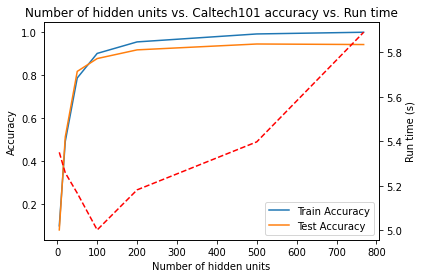

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time


def score(y, y_hat):
  return np.sum(np.argmax(y_hat, axis=-1) == np.argmax(y, axis=-1)) / len(y)

hidden_units = [5, 20, 50, 100, 200, 500, 768]
train_accuracy = []
test_accuracy = []
run_time = []

for n_h in hidden_units:
  t = time.time()
  os.system('/content/src/caltech101 -h %d' % n_h)
  tt = time.time() - t

  train_y = pd.read_csv('caltech101_train_y.txt', sep=' ', header=None).to_numpy()
  test_y = pd.read_csv('caltech101_test_y.txt', sep=' ', header=None).to_numpy()
  train_preds = pd.read_csv('caltech101_train_preds.txt', sep=' ', header=None).to_numpy()
  test_preds = pd.read_csv('caltech101_test_preds.txt', sep=' ', header=None).to_numpy()

  train_accuracy.append(score(train_y, train_preds))
  test_accuracy.append(score(test_y, test_preds))
  run_time.append(tt)

print('Training accuracy: ', train_accuracy)
print('Testing accuracy: ', test_accuracy)
print('Run time: ', run_time)

fig,ax = plt.subplots()
ax.plot(hidden_units, train_accuracy, label='Train Accuracy')
ax.plot(hidden_units, test_accuracy, label='Test Accuracy')
ax.set_title('Number of hidden units vs. Caltech101 accuracy vs. Run time')
ax.set_xlabel('Number of hidden units')
ax.set_ylabel('Accuracy')
ax.legend()

ax2=ax.twinx()
ax2.plot(hidden_units, run_time, 'r--', label='Run time')
ax2.set_ylabel('Run time (s)')

plt.show()

Training accuracy:  [0.018619791666666666, 0.16471354166666666, 0.4180989583333333, 0.6213541666666667, 0.7740885416666666, 0.9190104166666667, 0.980859375, 0.99921875, 1.0]
Testing accuracy:  [0.015429864253393665, 0.15687782805429865, 0.3685067873303167, 0.522262443438914, 0.6226696832579186, 0.7080542986425339, 0.7430316742081448, 0.7617647058823529, 0.7214027149321267]
Run time:  [19.267172813415527, 18.932897090911865, 18.28348135948181, 18.1601140499115, 19.176130771636963, 18.593515396118164, 19.686644554138184, 26.571058988571167, 144.37462162971497]


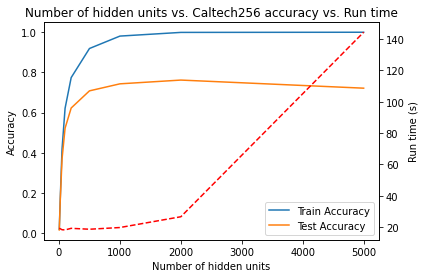

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time


def score(y, y_hat):
  return np.sum(np.argmax(y_hat, axis=-1) == np.argmax(y, axis=-1)) / len(y)

hidden_units = [5, 20, 50, 100, 200, 500, 1000, 2000, 5000]
train_accuracy = []
test_accuracy = []
run_time = []

for n_h in hidden_units:
  t = time.time()
  os.system('/content/src/caltech256 -h %d' % n_h)
  tt = time.time() - t

  train_y = pd.read_csv('caltech256_train_y.txt', sep=' ', header=None).to_numpy()
  test_y = pd.read_csv('caltech256_test_y.txt', sep=' ', header=None).to_numpy()
  train_preds = pd.read_csv('caltech256_train_preds.txt', sep=' ', header=None).to_numpy()
  test_preds = pd.read_csv('caltech256_test_preds.txt', sep=' ', header=None).to_numpy()

  train_accuracy.append(score(train_y, train_preds))
  test_accuracy.append(score(test_y, test_preds))
  run_time.append(tt)

print('Training accuracy: ', train_accuracy)
print('Testing accuracy: ', test_accuracy)
print('Run time: ', run_time)

fig,ax = plt.subplots()
ax.plot(hidden_units, train_accuracy, label='Train Accuracy')
ax.plot(hidden_units, test_accuracy, label='Test Accuracy')
ax.set_title('Number of hidden units vs. Caltech256 accuracy vs. Run time')
ax.set_xlabel('Number of hidden units')
ax.set_ylabel('Accuracy')
ax.legend()

ax2=ax.twinx()
ax2.plot(hidden_units, run_time, 'r--', label='Run time')
ax2.set_ylabel('Run time (s)')

plt.show()